In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [12]:
data = json.loads(open("time_diffs.json").read())
llm_times = pd.Series(data["llm_times"])
tts_times = pd.Series(data["tts_times"])
stt_times = pd.Series(data["stt_times"])
sent_audio_times = pd.Series(data["sent_audio_size"])
recieved_audio_times = pd.Series(data["recieved_audio_size"])
send_times = pd.Series(data["send_times"])
receive_times = pd.Series(data["receive_times"])

In [13]:
data = {
    "Receive Times": receive_times,
    "STT Times": stt_times,
    "LLM Times": llm_times,
    "TTS Times": tts_times,
    "Send Times": send_times,
}

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

In [14]:
df

,Receive Times,STT Times,LLM Times,TTS Times,Send Times
0,"[0.006038, 1747445644205.382, 1747445644205.388]","[2549.6077729999997, 1747445644206.1501, 17474...","[2749.141403, 1747445646756.2278, 174744564950...","[1930.1602579999999, 1747445649505.375, 174744...","[3347615, 1747445651436.6008, 1747445651439.9485]"
1,"[0.012787999999999999, 1747445652881.201, 1747...","[337.35376099999996, 1747445652881.559, 174744...","[1931.0654279999999, 1747445649505.3735, 17474...","[1436.568452, 1747445651436.4434, 174744565287...","[8495436, 1747445653442.9092, 1747445653451.4045]"
2,"[3.939049, 1747445686781.9321, 1747445686785.8...","[283.471753, 1747445686786.2534, 1747445687069...","[223.583687, 1747445653219.0823, 1747445653442...","[1860.4406339999998, 1747445653442.6716, 17474...","[8208141, 1747445655307.7668, 1747445655315.975]"
3,"[0.004679, 1747445733803.403, 1747445733803.4077]","[288.234621, 1747445733803.7021, 1747445734091...","[180.868386, 1747445687069.91, 1747445687250.7...","[1694.865374, 1747445687250.7832, 174744568894...","[7340882, 1747445688964.7449, 1747445688972.0857]"
4,"[0.007267999999999999, 1747445890363.438, 1747...","[1839.2789859999998, 1747445890364.23, 1747445...","[242.84895, 1747445734092.0889, 1747445734334....","[2860.847663, 1747445734334.9453, 174744573719...","[6368140, 1747445894393.118, 1747445894399.486]"
...,...,...,...,...,...
76,NaN,NaN,"[791.3645409999999, 1747856227397.3638, 174785...","[716.190651, 1747856228188.7336, 1747856228904...",NaN
77,NaN,NaN,"[198.73583499999998, 1747856239139.3135, 17478...","[807.2271979999999, 1747856239338.0554, 174785...",NaN
78,NaN,NaN,"[807.848904, 1747856239338.055, 1747856240145....","[860.5315919999999, 1747856240145.907, 1747856...",NaN
79,NaN,NaN,"[278.631636, 1747856264963.2747, 1747856265241...","[1367.9188729999998, 1747856265241.9148, 17478...",NaN


ValueError: boxplot method requires numerical columns, nothing to plot.

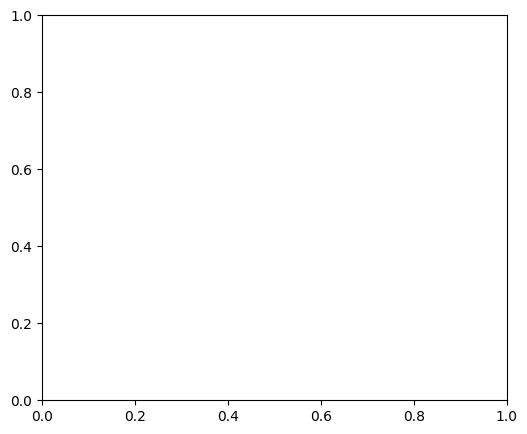

In [15]:
plt.figure(figsize=(6, 5))
df.boxplot()
# plt.title("Boxplot of All Times")
plt.ylabel("Time (ms)")
plt.ylim((-100,7000))
plt.show()

In [17]:
data = json.loads(open("time_diffs.json").read())
llm_times = pd.DataFrame(data["llm_times"])
stt_times = pd.DataFrame(data["stt_times"])
tts_times = pd.DataFrame(data["tts_times"])
sent_audio_times = pd.DataFrame(data["sent_audio_size"])
recieved_audio_times = pd.DataFrame(data["recieved_audio_size"])
send_times = pd.DataFrame(data["send_times"])
receive_times = pd.DataFrame(data["receive_times"])
basal_time = data["basal_time"]

In [18]:
timetext = pd.DataFrame({'time': llm_times[0], 'text': llm_times[3]}).dropna()

In [19]:
(timetext['time'] / timetext['text'].str.len()).describe()

count      81.000000
mean       69.667773
std       181.503022
min         4.552171
25%        10.784726
50%        26.986110
75%        56.112331
max      1334.723318
dtype: float64

In [20]:
llm_times[[1,2]]= llm_times[[1,2]] - basal_time
tts_times[[1,2]]= tts_times[[1,2]] - basal_time
stt_times[[1,2]]= stt_times[[1,2]] - basal_time
send_times[[1,2]]= (send_times[[1,2]]) - basal_time
receive_times[[1,2]]= receive_times[[1,2]] - basal_time
send_times[[0]] = send_times[[0]]*1e-6

<Axes: ylabel='Time (ms)'>

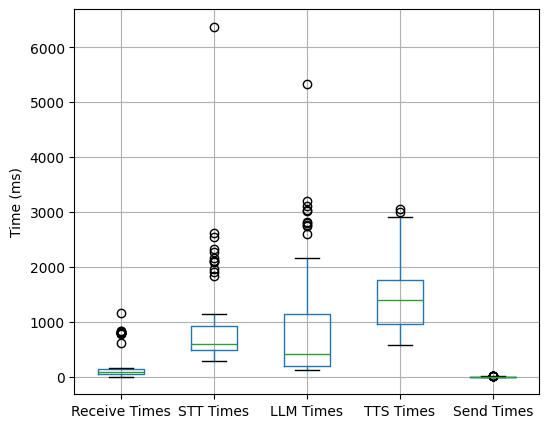

In [21]:
size_table = pd.DataFrame({
    "Receive Times": pd.Series(receive_times[0]),
    "STT Times": pd.Series(stt_times[0]),
    "LLM Times": pd.Series(llm_times[0]),
    "TTS Times": pd.Series(tts_times[0]),
    "Send Times": pd.Series(send_times[0]),
})
size_table.boxplot(column=["Receive Times", "STT Times", "LLM Times", "TTS Times", "Send Times"], ylabel="Time (ms)", figsize=(6, 5))

In [22]:
data_ini =pd.DataFrame({
    "Receive Times": pd.Series(receive_times[1]),
    "STT Times": pd.Series(stt_times[1]),
    "LLM Times": pd.Series(llm_times[1]),
    "TTS Times": pd.Series(tts_times[1]),
    "Send Times": pd.Series(send_times[1]),
})
size_table = pd.DataFrame({
    "Receive Times": pd.Series(receive_times[0]),
    "STT Times": pd.Series(stt_times[0]),
    "LLM Times": pd.Series(llm_times[0]),
    "TTS Times": pd.Series(tts_times[0]),
    "Send Times": pd.Series(send_times[0]),
})

In [23]:
size_table_1 = size_table.melt(var_name="Process", value_name="Time")
data_ini = data_ini.melt(var_name="Process", value_name="Time")
events_orders = data_ini.sort_values(by="Time", ascending=True).index
df = size_table_1.loc[events_orders].dropna()

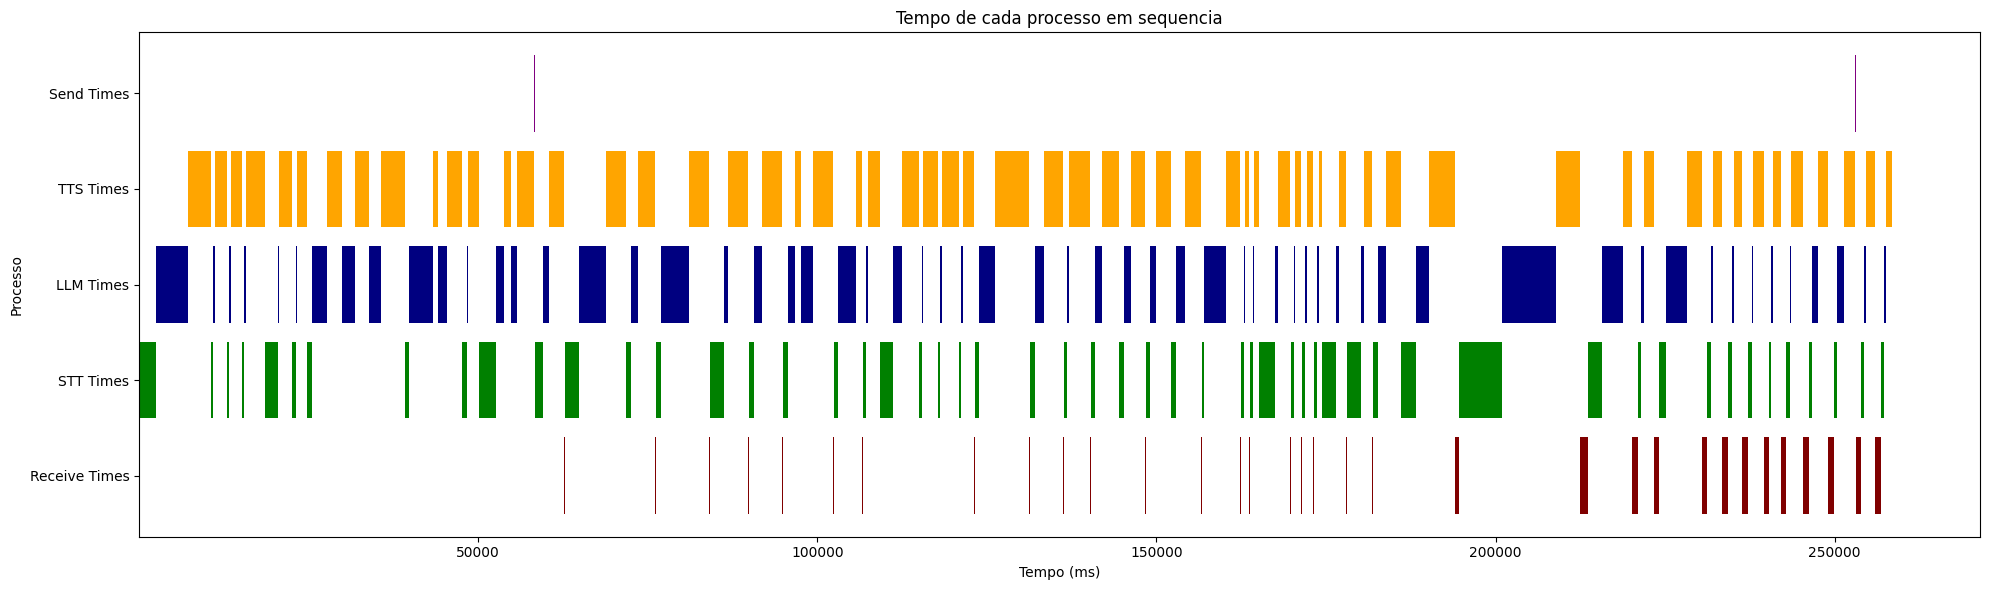

In [24]:
# Calcular a posição inicial de cada barra
df['start'] = df['Time'].cumsum().shift(fill_value=0)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(20, 6))

color_dict = {
    "Receive Times": "#800000",  # red
    "STT Times": "#008000",     # green
    "LLM Times": "#000080",     # blue
    "TTS Times": "#FFA500",     # orange
    "Send Times": "#800080"     # purple
}

for i, row in df.iterrows():
    ax.barh(row['Process'], row['Time'], left=row['start'], color=color_dict[row["Process"]])

# Configurar rótulos e título
plt.xlabel('Tempo (ms)')
plt.ylabel('Processo')
plt.title('Tempo de cada processo em sequencia')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<Axes: title={'center': 'Tempo de cada processo acumulado'}, xlabel='Processo', ylabel='Tempo (%)'>

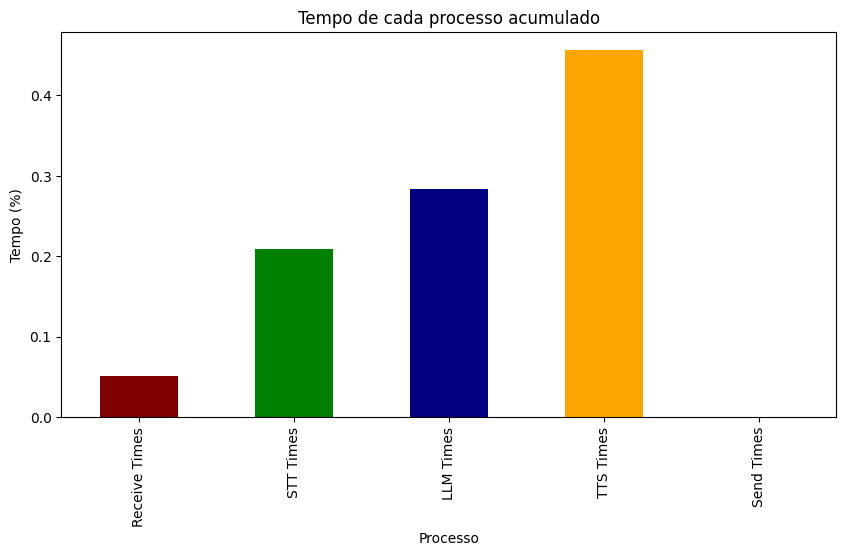

In [25]:
df = size_table.sum(axis=0)
df = df / df.sum(axis=0)
df.plot(title="Tempo de cada processo acumulado", kind='bar', figsize=(10, 5), color=color_dict.values(), xlabel="Processo", ylabel="Tempo (%)")

Ja tem uma llm que passa no teste de turing(Referenciar).
VR afeta o teste de turing? como provar:
    Ao Usar o AI no VR, se as pessoas preferem o IA ao Humano?
    As pessoas se enganam oque é humano
     e o que é IA?
    O que isso significa para no VR?
